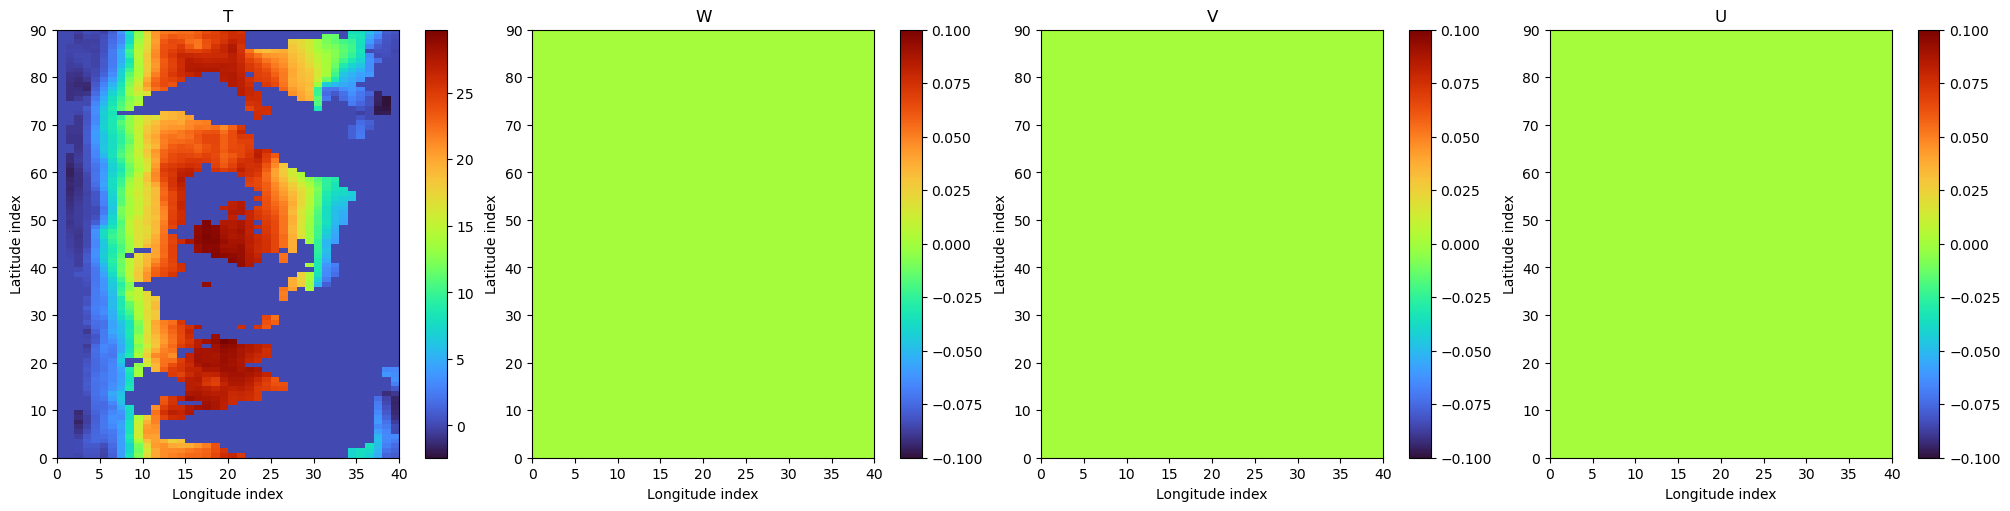

In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt

base_dir   = r"C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging"
file_specs = ["T", "W", "V", "U"]

dims = (90, 40, 15)

def load_field(varname):
    path = os.path.join(base_dir, f"{varname}.0000000000.data")
    flat = np.fromfile(path, dtype=">f4")                      
    arr3 = flat.reshape(dims, order="F").transpose(2, 0, 1)     
    return arr3

data = {name: load_field(name) for name in file_specs}
n = len(data)
fig, axes = plt.subplots(1, n, figsize=(5*n, 5), constrained_layout=True)

for ax, (name, arr) in zip(axes, data.items()):
    pcm = ax.pcolormesh(arr[0, :, :], shading="auto", cmap="turbo")
    ax.set_title(name)
    ax.set_xlabel("Longitude index")
    ax.set_ylabel("Latitude index")
    fig.colorbar(pcm, ax=ax, orientation="vertical")

plt.show()


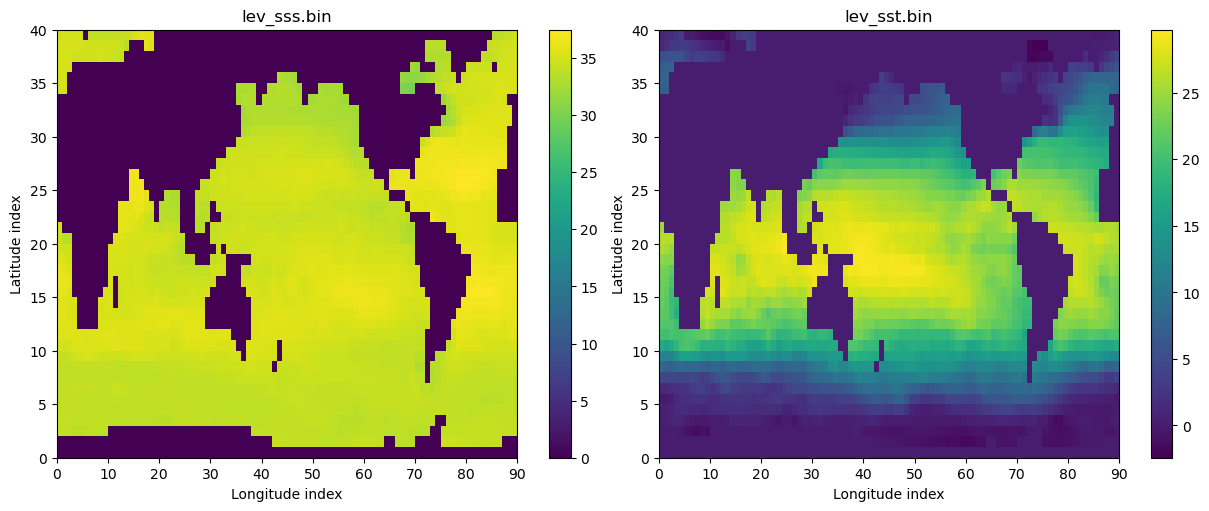

In [ ]:
base_dir   = r"C:/Users/romed/Desktop/github fixer/cs185c_spring2025/modeldubugging"
files      = ["lev_sss.bin", "lev_sst.bin"]
orig_dims  = (90, 40, 12)   

data = {}
for fname in files:
    path = os.path.join(base_dir, fname)
    flat = np.fromfile(path, dtype=">f4")
    arr  = flat.reshape(orig_dims, order="F").transpose(2, 1, 0)
    data[fname] = arr


fig, axes = plt.subplots(1, len(files), figsize=(6 * len(files), 5), constrained_layout=True)
for ax, fname in zip(axes, files):
    arr = data[fname]
    pcm = ax.pcolormesh(arr[0, :, :], shading="auto")
    ax.set_title(fname)
    ax.set_xlabel("Longitude index")
    ax.set_ylabel("Latitude index")
    fig.colorbar(pcm, ax=ax, orientation="vertical")

plt.show()